<a href="https://colab.research.google.com/github/haynapasi050505/supervised-machine-learning-regression-NYC-taxi-trip/blob/main/NYC_Taxi_Trip_Duration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import seaborn as sns
sns.set()


In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset file Path
dir_path = '/content/drive/MyDrive/NYC Taxi Data.csv'

In [ ]:
# reading the file
df = pd.read_csv(dir_path)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
# column names in our dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#shape of dataset
df.shape

(1458644, 11)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The returned table gives certain insights:

1. There are no numerical columns with missing data
2. The passenger count varies between 1 and 9 with most people number of people being  1 or 2 we can observe that there is minimum value is 0 in pasenger count which is unjustified 


In [ ]:
# checking for value counts in passenger counnt
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Here, the no of records with passenger count 0 ,9 and 7 are very small compared to the entire data set. hence, we will drop the values

In [ ]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

In [ ]:
# checking for missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We dont have any null values in any column.

In [ ]:
# checking for data type of our columns
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

The 2 coumns pickup_datetime and dropoff_datetime is object type.
we are now going to convert them in datetime format

In [ ]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

In [ ]:
#converting dates into days of the week
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
# counting the values for each day for pickup
df['pickup_day'].value_counts()

Friday       223521
Saturday     220855
Thursday     218566
Wednesday    210132
Tuesday      202745
Sunday       195352
Monday       187408
Name: pickup_day, dtype: int64

In [ ]:
# counting the values for each day for dropoff
df['dropoff_day'].value_counts()

Friday       223020
Saturday     220888
Thursday     217738
Wednesday    209786
Tuesday      202513
Sunday       197210
Monday       187424
Name: dropoff_day, dtype: int64

The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [ ]:
def timezone(x):
  if x >= datetime.time(4,0,1) and x <= datetime.time(10,0,0):
    return 'morning'
  if x>= datetime.time(10,0,1) and x<= datetime.time(16 , 0, 0):
    return'midday'
  if x >= datetime.time(16,0,1) and x<= datetime.time(22,0,0):
    return'evening'
  elif x<= datetime.time(22,0,1) or x<= datetime.time(4,0,0):
    return 'late night'

In [ ]:
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [ ]:
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

Converting it into pickup and dropoff hours

In [ ]:
df['pickup_hour']= df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [ ]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

Lets plot a box plot the our dependent variable to check for any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


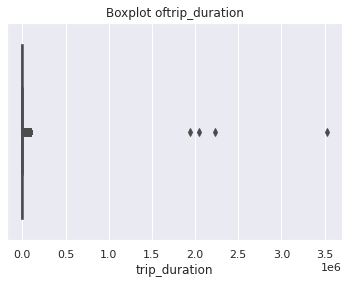

In [ ]:
sns.boxplot(df['trip_duration'])
plt.title('Boxplot oftrip_duration')
plt.show()

we can see that there are 4 observations which are far away from our other observations.
we will remove them

In [ ]:
df = df[df.trip_duration < 90000]  #you have to run this code 4 times

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


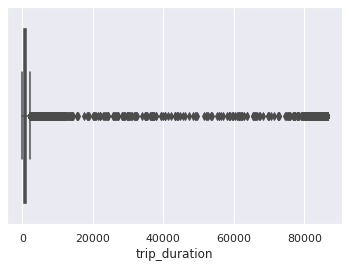

In [ ]:
sns.boxplot(df['trip_duration'])

In [ ]:
#cheacking for any value in trip duration have value zero
print(len(df[df.trip_duration == 0]))

0


Lets plot distribution plot for trip duration 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


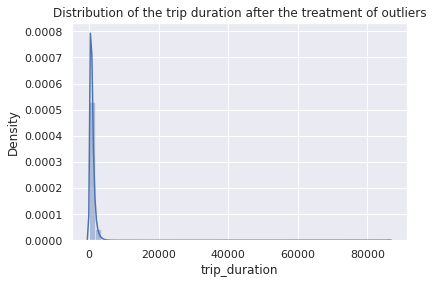

In [ ]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the trip duration after the treatment of outliers')
plt.show()


 still there is an extreme right skewness.

Distribution of pickup latitude

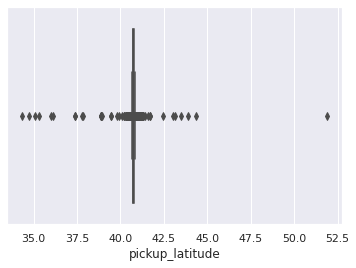

In [ ]:
# box plot of pickup latitude
sns.boxplot(x=df['pickup_latitude'])
plt.show()

In [ ]:
# removing some outliers
df = df[df.pickup_latitude < 42.5]
df = df[df.pickup_latitude > 39.0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


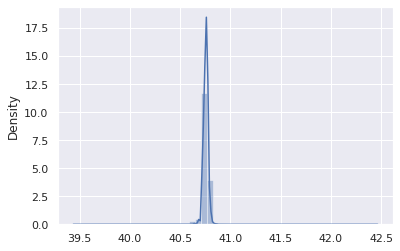

In [ ]:
#Distribution plot of pickup latitude
sns.distplot(x=df['pickup_latitude'])
plt.show()

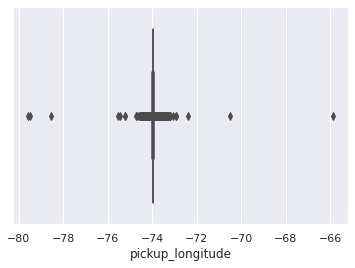

In [ ]:
#box plot of pickup longitude
sns.boxplot(x=df['pickup_longitude'])
plt.show()

In [ ]:
df = df[df.pickup_longitude < -73]
df = df[df.pickup_longitude > -75.3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


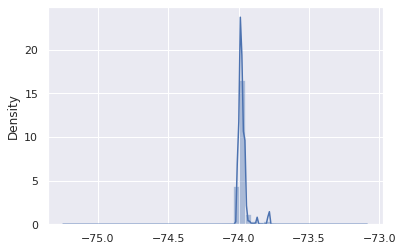

In [ ]:
#distribution plot of pickup longitude
sns.distplot(x=df['pickup_longitude'])
plt.show()

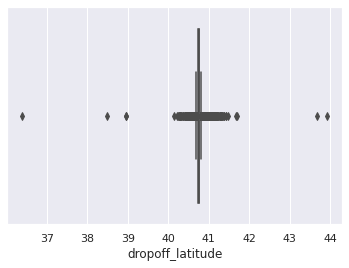

In [ ]:
#box plot of dropoff latitude
sns.boxplot(x=df['dropoff_latitude'])
plt.show()

In [ ]:
df = df[df.dropoff_latitude < 42.5]
df = df[df.dropoff_latitude > 40.0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


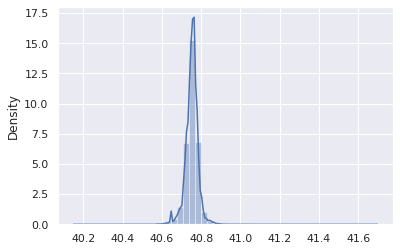

In [ ]:
#distribution plot of dropoff lattitude
sns.distplot(x=df['dropoff_latitude'])
plt.show()

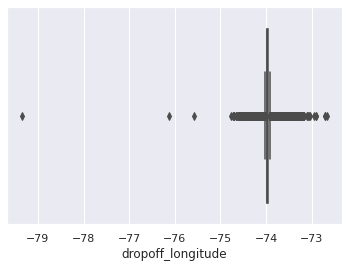

In [ ]:
#box plot of dropoff longitude
sns.boxplot(x=df['dropoff_longitude'])
plt.show()

In [ ]:
df = df[df.dropoff_longitude > -75]  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


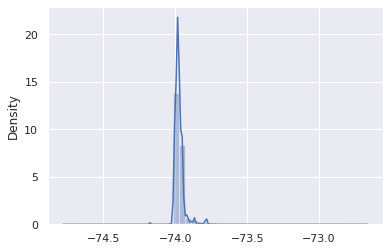

In [ ]:
#distribution plot of dropoff longitude
sns.distplot(x=df['dropoff_longitude'])
plt.show()

so, upto now we have removed some those observation from pickup latitude, pickup lomgitude, dropoff latitude and dropoff longitude which are far away from other obsevation.
By boxplot we can see there are so many outliers but they are useful for our model prediction

**EDA**

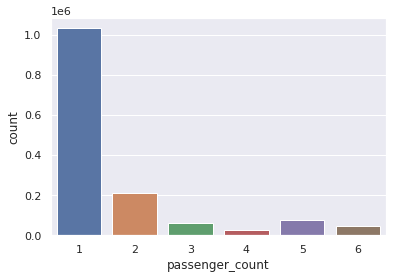

In [ ]:
# count plot of passenger count
sns.countplot(x=df['passenger_count'] , data=df)
plt.show()


From obove plot we can see that the maximum count of passenger is 1

The distribution of days of the week can be seen graphically

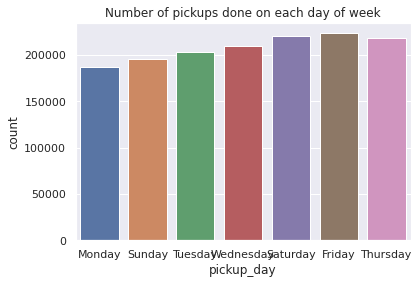

In [ ]:
sns.countplot(x=df['pickup_day'])
plt.title('Number of pickups done on each day of week')
plt.show()

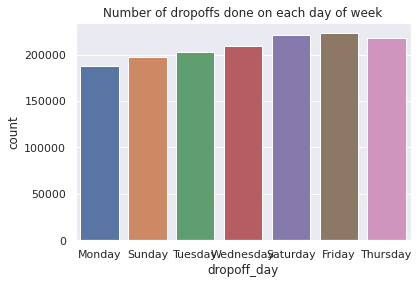

In [ ]:
sns.countplot(x=df['dropoff_day'])
plt.title('Number of dropoffs done on each day of week')
plt.show()

Drom obove two plots of pickup day and dropoff day we can see that majority of trip has done on friday and  saturday.

the distribution of the timezones

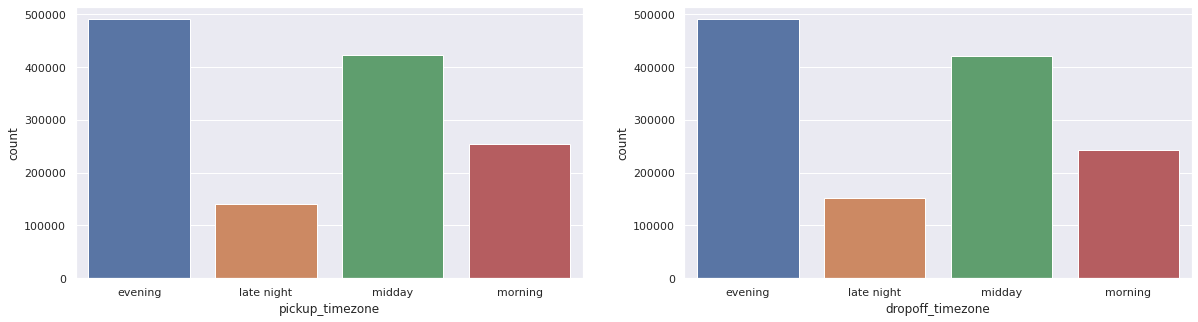

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_timezone' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_timezone' , data = df , ax= ax2)


From obove plot most trips have happened in evening and midday


The distributrion of each month

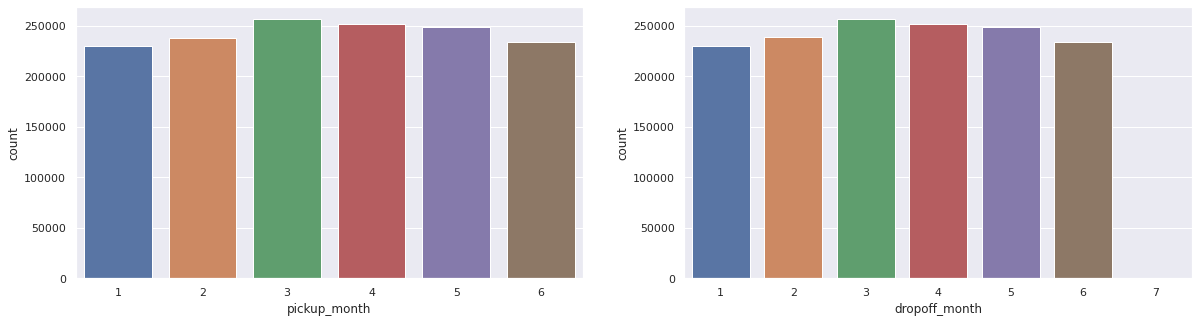

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_month' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_month' , data = df , ax= ax2)


Disdtriribution plots of Hours

Text(0.5, 1.0, 'Distribution plot of dropoff hours')

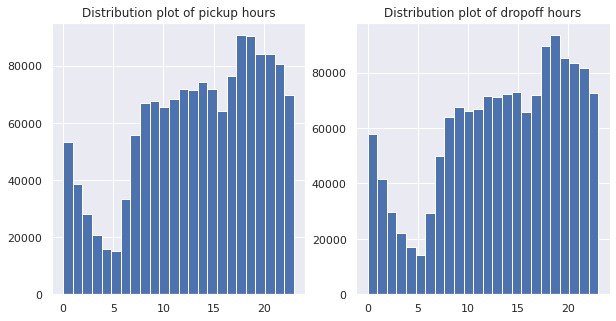

In [ ]:
figure,ax=plt.subplots(nrows=1 , ncols=2 , figsize = (10,5))
df.pickup_hour.hist(bins=24 , ax=ax[0])
ax[0].set_title('Distribution plot of pickup hours')
df.dropoff_hour.hist(bins=24 , ax= ax[1])
ax[1].set_title('Distribution plot of dropoff hours')

The 2 distributions are almost similar

Distribution of the stored and forward flag

In [ ]:
# counting the values in store and fwd flag
df['store_and_fwd_flag'].value_counts()

N    1450493
Y       8042
Name: store_and_fwd_flag, dtype: int64

The number of N flag is much larger. 

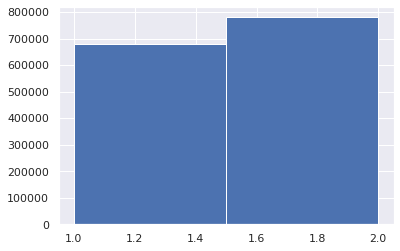

In [ ]:
#Distribution of vendor id
df['vendor_id'].hist(bins=2)

There is not much differance in vendor id's

In [ ]:
# checking for column names after creating new columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month'],
      dtype='object')

Lets now look at the relationship between each of the variables with the target variable trip_duration.

The relationship between Trip Duration and The day of the week

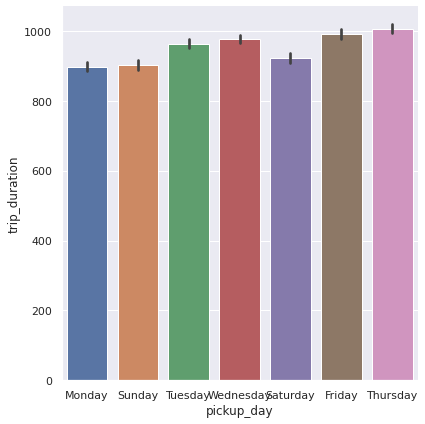

In [ ]:
sns.catplot(x='pickup_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

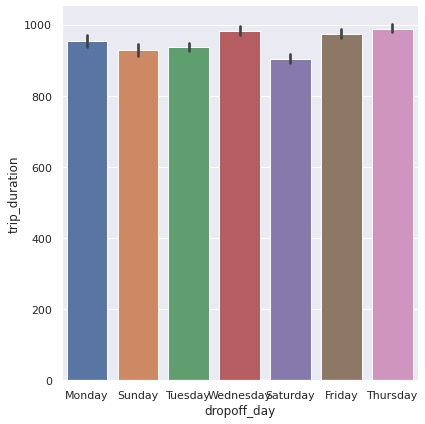

In [ ]:
sns.catplot(x='dropoff_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

Thus the highest avg time taken to complete a trip is on Thursday , friday and wednesday while Monday, Saturday and Sunday takes the least time.

The relationship between Trip Duration and The time of the day

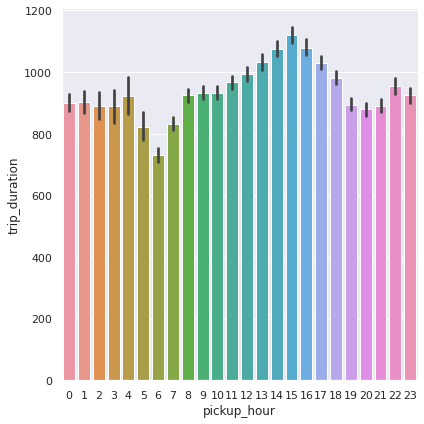

In [ ]:
sns.catplot(x='pickup_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

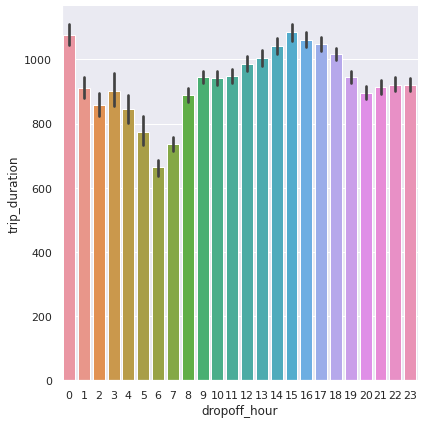

In [ ]:
sns.catplot(x='dropoff_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

The relationship between passenger count and duration

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


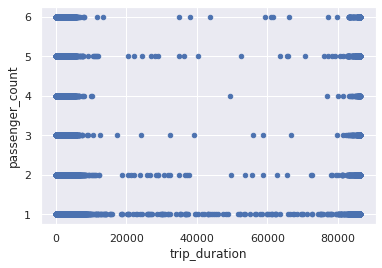

In [ ]:
df.plot.scatter( x= 'trip_duration', y='passenger_count' )

 the trip duration time is more or less evenly distributed only for passenger count 1.

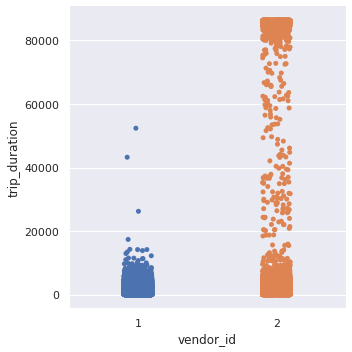

In [ ]:
sns.catplot(x='vendor_id' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

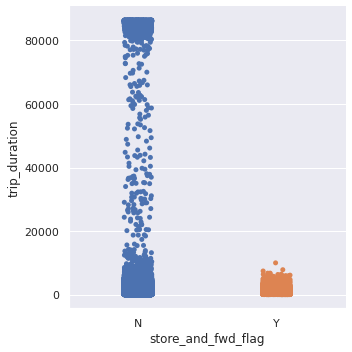

In [ ]:
sns.catplot(x='store_and_fwd_flag' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

Thus we see the flag was stored only for short duration trips and for long duration trips the flag was less stored.

converting trip duration value (in seconds) to hours

In [ ]:
df['trip_duration_hour'] = df['trip_duration']/3600

 Distance, Speed

creating a function which returns the distance between a pair of latitudes and longitudes using the haversine distance formula.

In [ ]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt

def haversine(df):
  lat1 = df.pickup_latitude 
  lon1 = df.pickup_longitude 
  lat2 = df.dropoff_latitude
  lon2 = df.dropoff_longitude
  R = 3959.87433 
  #this is in miles. For earth radius inkilometers use 6372.8 km
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
  return R*c


In [ ]:
# calculating distance by  using the haversine distance formula.
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

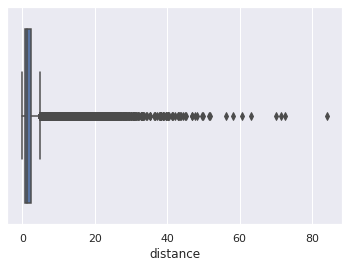

In [ ]:
sns.boxplot(x=df['distance'])
plt.show()

In [ ]:
# checking for any value as zero in distance column
print(len(df[df.distance == 0]))

5868


We will not drop these rows. Rather we will replace these datas with the average distance

In [ ]:

df = df[df.distance < 65]

In [ ]:
#Replacing value od zero with mean valueò of distance
mean_dist = df['distance'].mean()
df.loc[df['distance']==0 , 'distance']=mean_dist

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#calculating speed 
df['speed']=df['distance']/df['trip_duration_hour']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here we see several outliers.

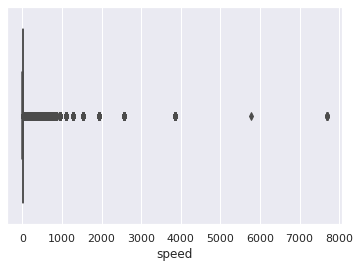

In [ ]:
sns.boxplot(x=df['speed'])

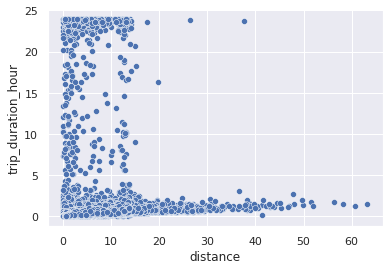

In [ ]:
sns.scatterplot(x='distance' , y = 'trip_duration_hour' , data = df)

In [ ]:
print(len(df[df.distance == 0]))

0


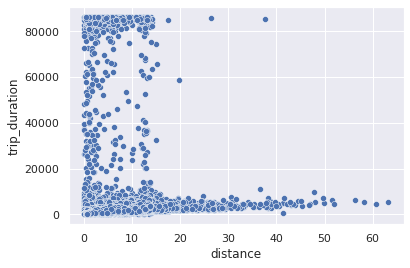

In [ ]:
sns.scatterplot(data=df , x='distance' , y='trip_duration')

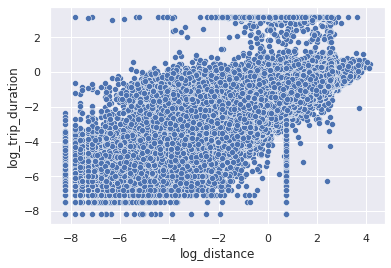

In [ ]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

Here we see that the log transformed value of trip duration and distance has a somewhat linear relationship. But still there are some  data points where the duration value is not changing even with the change in distance.

We will thus drop the rows beyond log_trip_duration > 2

In [ ]:
df=df[df.log_trip_duration<2]

 latitude longitudes were converted to distance,pickup and drop off datetime were converted corresponding months and weekdays etc.



In [ ]:
df_update = df.loc[:,['passenger_count' , 'store_and_fwd_flag' , 'trip_duration' , 'pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone' , 'speed' ,'log_distance' , 'distance']]

We will now transform the categorical features from data2 dataframe through one hot encoding.



In [ ]:
df_update = pd.get_dummies(df_update , columns=['store_and_fwd_flag','pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone'])

In [ ]:
# Data for all the independent variables
x = df_update.drop(['trip_duration'] , axis=1)
# Data for the dependent variable
y= df_update['trip_duration']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.20 , random_state = 7)

**Linear Regression**

In [ ]:
## import libraray for linear regression model
from sklearn.linear_model import LinearRegression , Lasso , Ridge
ml = LinearRegression()
ml.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[1025.2562793   550.87133944 1756.42505724 ... 1110.39012881  465.77207914
  381.15171462]


**Evaluation Matrix**

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.6385635577343609


In [ ]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 159021.56467642263
RMSE : 398.7750803102203


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 260.09087211277085


Text(0, 0.5, 'Predicted')

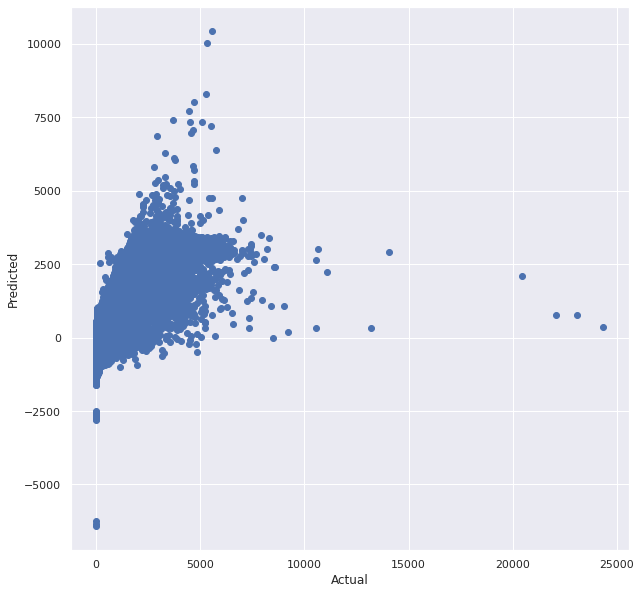

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
1003422,1235,1025.256279,209.743721
1274202,538,550.871339,-12.871339
1333814,1402,1756.425057,-354.425057
804650,594,784.676423,-190.676423
248070,404,594.746798,-190.746798
...,...,...,...
672317,809,1072.040974,-263.040974
263092,13,40.482821,-27.482821
1325138,861,1110.390129,-249.390129
386326,395,465.772079,-70.772079


Here we can see that there is lot of differance in actal and predicted value of trip duration

**Lasso Regression**

In [ ]:
#Hyperparameter tuning
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+10, tolerance: 5.216e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.001)

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.6386294936410195


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 158992.5547874931
RMSE : 398.7387049027133


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 260.0593561578203


**Ridge Rigression**

In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=30)
ridge.fit(x_train, y_train)

Ridge(alpha=30)

In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.6386180777629248


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 158997.57744316498
RMSE : 398.7450030322198


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 260.05362734710684



**RandomForest Algorithm**

In [ ]:
#importing library for Random forest model
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(bootstrap = True, max_depth = 7 , max_features=15 , min_samples_leaf =3 , min_samples_split = 10,n_estimators = 200 , random_state = 7)

In [ ]:
#Training the model
rfc.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_features=15, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200, random_state=7)

In [ ]:
y_pred=rfc.predict(x_test)

**Evaluation Matrix**

In [ ]:
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.9132570595206929


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 38164.38108229068
RMSE : 195.35706048743333


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 98.90383585599346


Text(0, 0.5, 'Predicted')

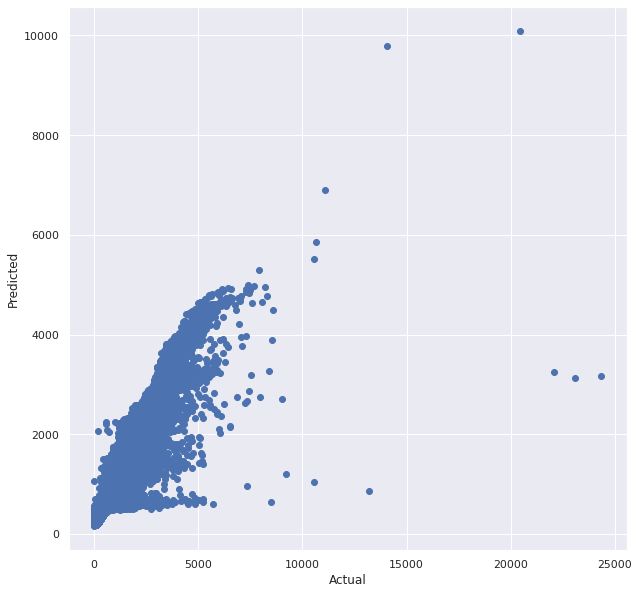

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

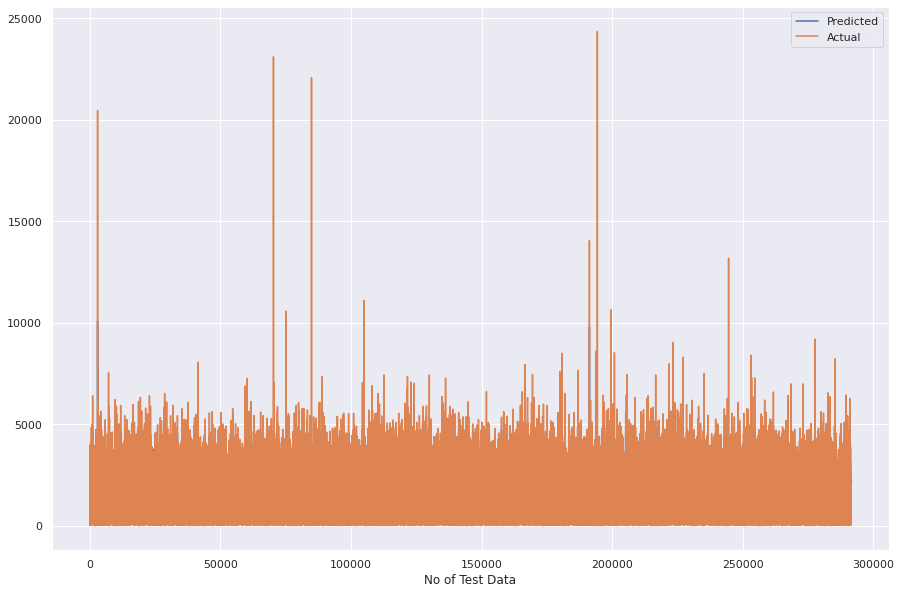

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


In [ ]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
1003422,1235,1133.381255,101.618745
1274202,538,518.201017,19.798983
1333814,1402,1469.211898,-67.211898
804650,594,667.707571,-73.707571
248070,404,452.218303,-48.218303
...,...,...,...
672317,809,872.166205,-63.166205
263092,13,177.715311,-164.715311
1325138,861,929.790706,-68.790706
386326,395,443.213606,-48.213606


Here, we can see that there so much differance in actal and predicted value of trip duration

**GradiantBoosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [ ]:
ensemble.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred=ensemble.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.989272741720185


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 4719.682900958173
RMSE : 68.69994833300949


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 29.993256837786426


Text(0, 0.5, 'Predicted')

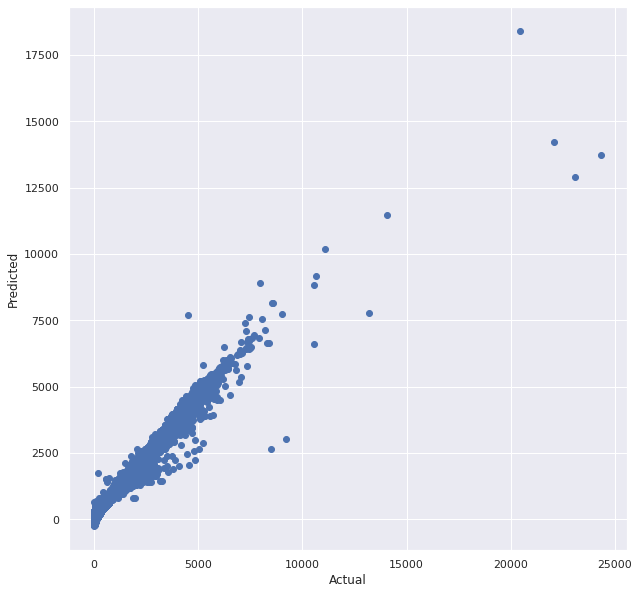

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

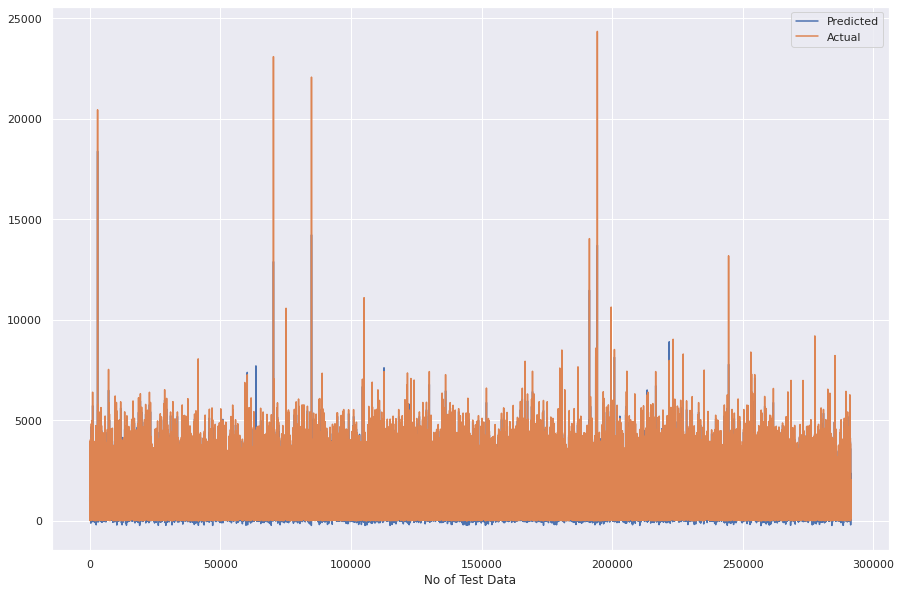

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


In [ ]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
1003422,1235,1163.701614,71.298386
1274202,538,544.457972,-6.457972
1333814,1402,1339.074013,62.925987
804650,594,571.796290,22.203710
248070,404,435.136654,-31.136654
...,...,...,...
672317,809,801.340940,7.659060
263092,13,-207.623608,220.623608
1325138,861,893.833902,-32.833902
386326,395,410.556913,-15.556913


Here we can see that there is still some differance in predicted and actual value of trip duration.

**XGBoost**

In [ ]:
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(booster= 'gbtree', colsample_bylevel= 1,colsample_bynode= 1,colsample_bytree= 0.7,eta= 0.004, gamma= 0,importance_type= 'gain', learning_rate= 0.1,max_delta_step= 0,max_depth= 9,min_child_weight= 10,n_estimators= 100,n_jobs= 1,objective= 'reg:linear',random_state= 0,reg_alpha= 0,reg_lambda= 1,scale_pos_weight= 1,subsample= 1,verbosity= 1)



In [ ]:
dreg.fit(x_train, y_train)

[12:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, max_depth=9, min_child_weight=10)

In [ ]:
y_pred = dreg.predict(x_test)

In [ ]:
#Find R-squared value
R2_score = r2_score(y_test , y_pred)
print("r2 score :" , R2_score)

r2 score : 0.9964527028421417


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1577.7799476170057
RMSE : 39.721278272696686


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 7.13538918665949


Text(0, 0.5, 'Predicted')

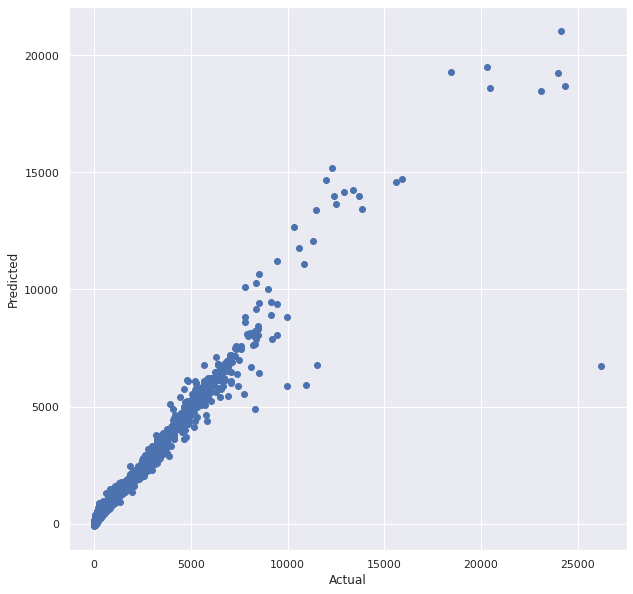

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

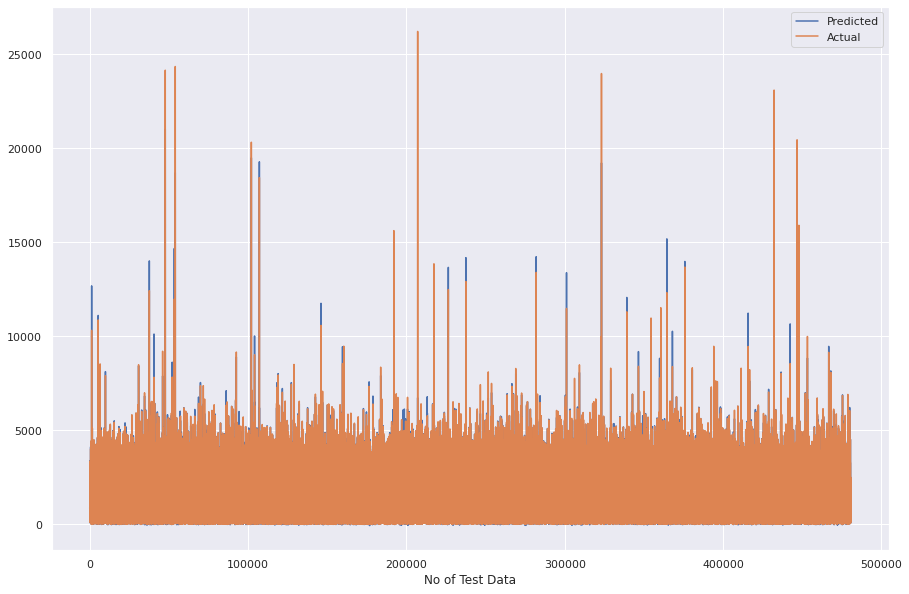

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
181906,879,876.438721,2.561279
1446754,470,468.423096,1.576904
491700,284,284.980316,-0.980316
83520,417,419.794617,-2.794617
1108802,762,748.812500,13.187500
...,...,...,...
877691,414,412.874023,1.125977
492479,1657,1651.824097,5.175903
798297,258,256.877411,1.122589
1326880,393,390.471954,2.528046


Here we can see that there is not much differance in predicted and actual value of trip duration.

**Conclusion:**

Trip Duration varies a lot ranging from few seconds to more than 20 hours

Most trips are taken on Friday , Saturday and Thursday.

The average duration of a trip is most on Thursday and Friday.

The average duration of trips started in between 14 hours and 17 hours is the largest.

Vendor 2 mostly provides the longer trips.
The flag was stored only for short duration trips and for long duration trips the flag was less stored.

When we compare the root mean squared error and mean absolute error of all the models, the XGBoost model has less root mean squared error and mean absolute error, ending with the accuracy of 99% .
so, finally this model is best for predicting the trip duration count on daily basis.